In [1]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv('hr.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df.shape

(1470, 35)

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [14]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [23]:
# check wether gender influence on attrition
#attrition(categorical)
#gender(categorical)
# proportion of male leaving the company = proportion of female leaving the company
# proportion of male leaving the company = proportion of female leaving the company

In [17]:
ct=pd.crosstab(df['Gender'],df['Attrition'])
ct

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


In [20]:
from statsmodels.stats.proportion import proportions_ztest

In [21]:
x=np.array([150,87])
n=np.array([882,588])

In [22]:
proportions_ztest(x,n)

(1.1292547809155016, 0.2587903704911598)

p_value greatre than 0.05 so we reject the alternate hypothesis

In [27]:
# check wether attrition is influence by department 
# department(3 category)
# attrition(2 category)
# chi_square
# h0: proportion of r&d leaving = proportion of sales leaving = proportion of hr leaving
# ha: proportion of r&d leaving != proportion of sales leaving != proportion of hr leaving

In [26]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [29]:
ct=pd.crosstab(df['Attrition'],df['Department'])
ct

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [31]:
from scipy.stats import chisquare

In [32]:
chisquare(ct)

Power_divergenceResult(statistic=array([ 24.14285714, 502.62747138, 153.9103139 ]), pvalue=array([8.94473182e-007, 2.54852279e-111, 2.42286309e-035]))

p_value less than 0.05 we reject the null hypothesis

In [34]:
#post hoc analysis
51+12
51/63,12/63

(0.8095238095238095, 0.19047619047619047)

In [39]:
# R and D
828+133
828/961,133/961
# department of R&d attrition level is very low

(0.8616024973985432, 0.1383975026014568)

In [38]:
#sales
354+92
354/446,92/446

(0.7937219730941704, 0.2062780269058296)

In [41]:
# check is there any discripancy in monthly average income with respect to gender
# category gender(male/female)
# income:-gender
# two sample ttest

In [56]:
g1=df['MonthlyIncome'][df['Gender']=='Male']
g2=df['MonthlyIncome'][df['Gender']=='Female']

In [59]:
# check data is normal or not
# h0: Data is normal
# ha: Data is not normal
from scipy.stats import shapiro,levene,bartlett,ttest_ind,mannwhitneyu

In [63]:
print(shapiro(g1))
print(shapiro(g2))

ShapiroResult(statistic=0.8169718384742737, pvalue=1.709933327621381e-30)
ShapiroResult(statistic=0.8416616916656494, pvalue=9.378564564919968e-24)


In [64]:
# p_value less than 0.05 reject null hypothesis and we can say data is not normal
# now we go for bartlette and non-parametric test

In [66]:
bartlett(g1,g2)
#p_value >0.05 reject alternate hypothesis and both group variance is same

BartlettResult(statistic=0.01177553932613755, pvalue=0.9135870578638189)

In [67]:
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=245722.5, pvalue=0.044208341633010594)

In [72]:
# p_value less than 0.05 reject null hypothesis 
# average_salary of male is not equal to average salary of female
# male(6380) female(6686)

In [73]:
# check is there any difference in avg salary of department (three groups annova)
# department(r&d,sales,hr)
# Monthly_income (numerical)
# h0: avg salary of r&d =avg_Salary of sales= avg salary of hr
# ha: avg salary of r&d !=avg_Salary of sales!= avg salary of hr

In [79]:
g1=df['MonthlyIncome'][df['Department']=='Research & Development']
g2=df['MonthlyIncome'][df['Department']=='Sales']
g3=df['MonthlyIncome'][df['Department']=='Human Resources']

In [80]:
from scipy.stats import f_oneway

In [81]:
f_oneway(g1,g2,g3)

F_onewayResult(statistic=3.2017829294201707, pvalue=0.04097409724987449)

In [86]:
# p_value less than 0.05 reject null hypothesis avg salary of department is not same
# r&d (6281.25) sales(6959) hr(6654)
# sales department earns more salary

In [87]:
# check wether avg salary is influenced by education

In [88]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [91]:
g1=df['MonthlyIncome'][df['Education']==1]
g2=df['MonthlyIncome'][df['Education']==2]
g3=df['MonthlyIncome'][df['Education']==3]
g4=df['MonthlyIncome'][df['Education']==4]
g5=df['MonthlyIncome'][df['Education']==5]

In [92]:
f_oneway(g1,g2,g3,g4,g5)

F_onewayResult(statistic=3.8929774134094077, pvalue=0.003768508926919263)

In [93]:
# reject null hypothesis

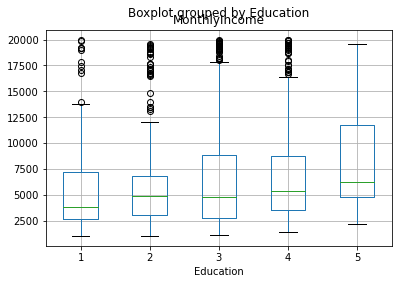

In [98]:
import matplotlib.pyplot as plt
df.boxplot(column='MonthlyIncome',by='Education')
plt.show()